## LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
Census income dataset to predict if whether income exceeds $50K/yr  

- **age**: continuous.  
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
- **fnlwgt**: continuous. Number of the people in the census. 
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
- **education-num**: continuous. Total number of years of education. 
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
- **sex**: Female, Male.  
- **capital-gain**: continuous.  
- **capital-loss**: continuous.  
- **hours-per-week**: continuous.  
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  
- **income**: >50K, <=50K  

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# Define the column names as a list
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
                'capital-loss', 'hours-per-week', 'native-country', 'income']

### 2. Load Dataset

In [3]:
dataset = pd.read_csv("dataset/adult.data", names = column_names, sep = ",", skipinitialspace=True)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  32561
#Features =  15


In [5]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K


In [6]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  2399


Filtering missing values

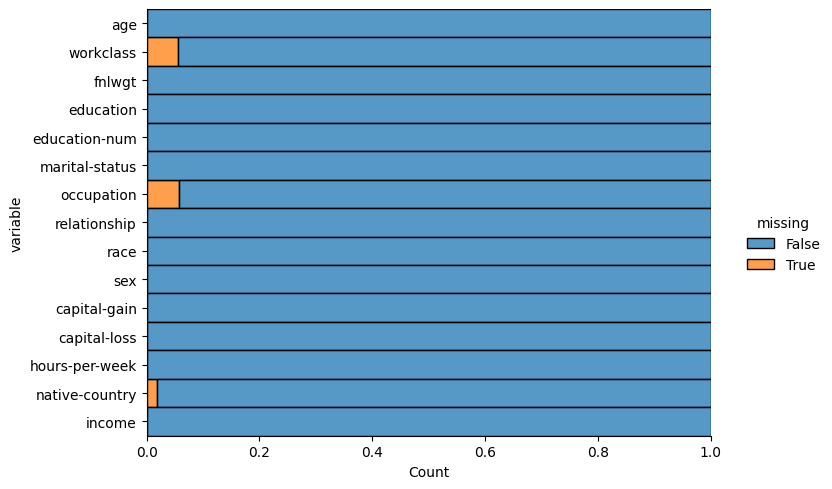

In [7]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [8]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  30162


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [9]:
# list of numerical variables 
numerical_cols = ["age", "fnlwgt","education-num", "capital-gain", "capital-loss", "hours-per-week"]

Histogram with Frequencies

In [10]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

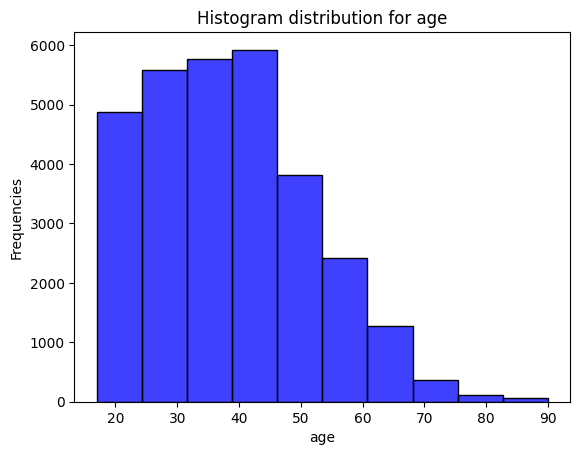

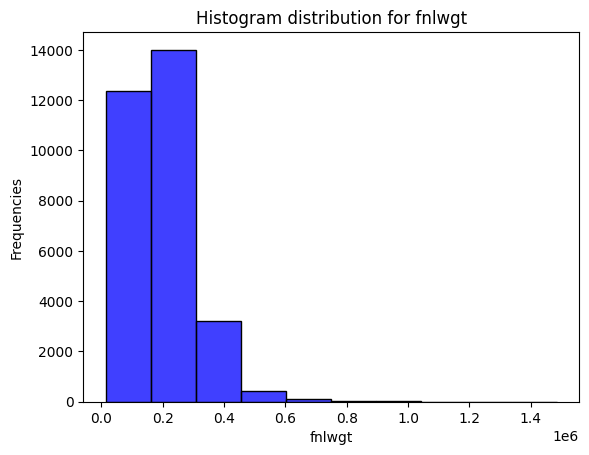

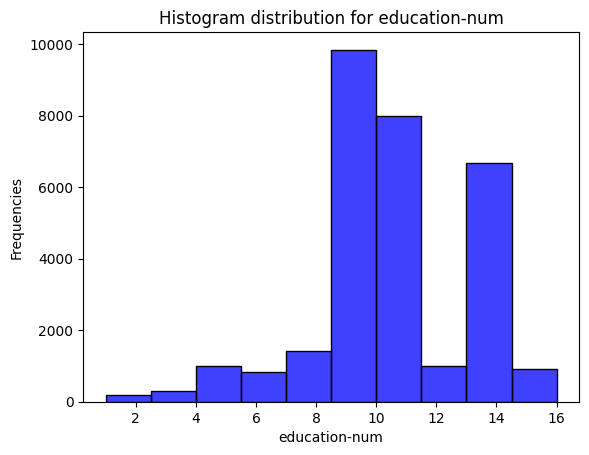

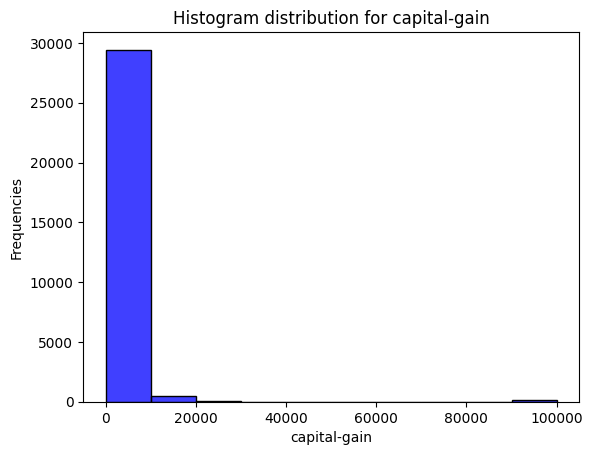

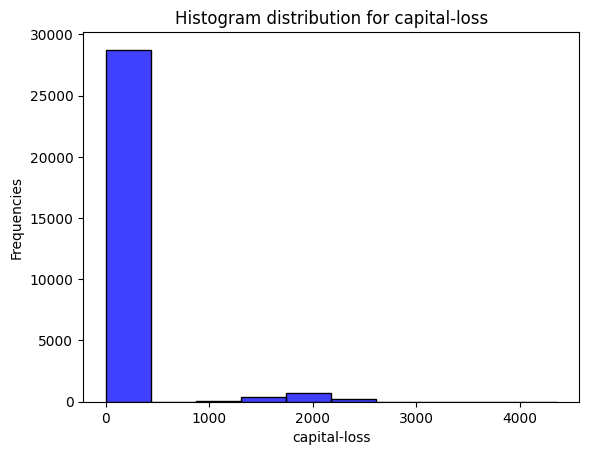

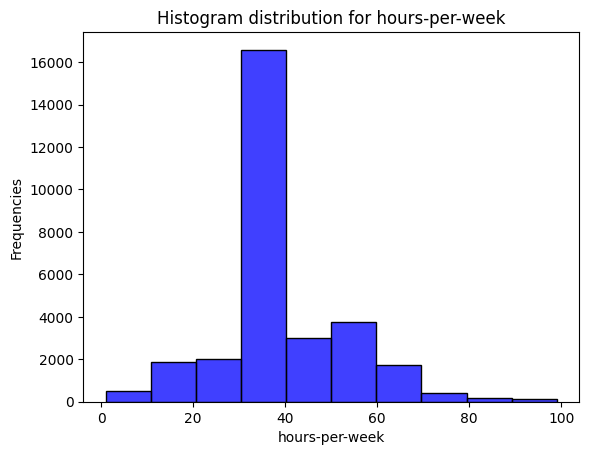

In [11]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [12]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

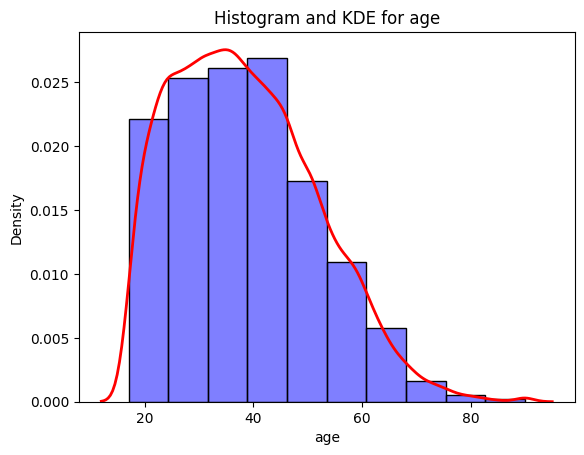

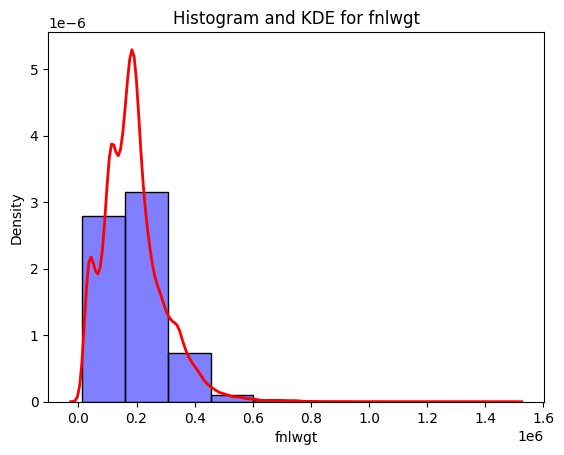

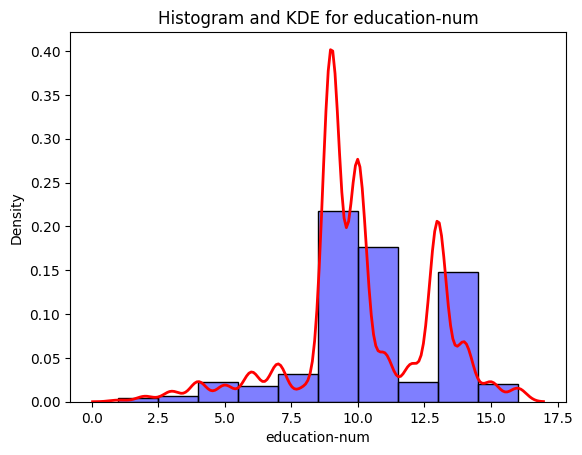

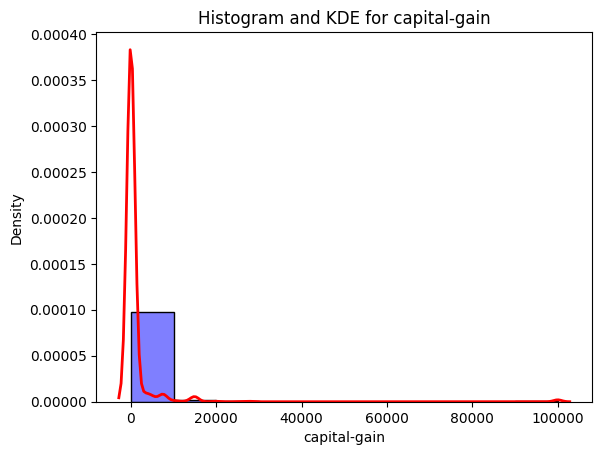

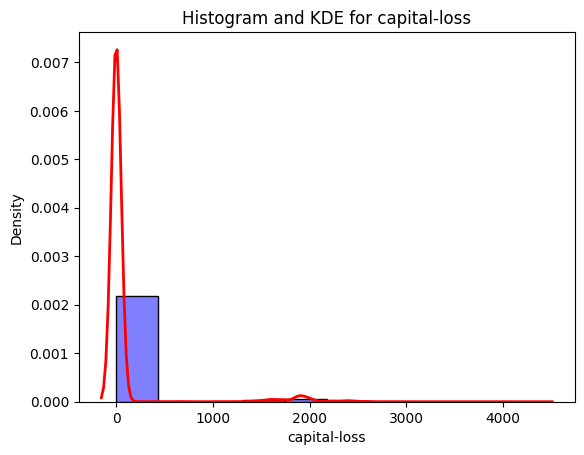

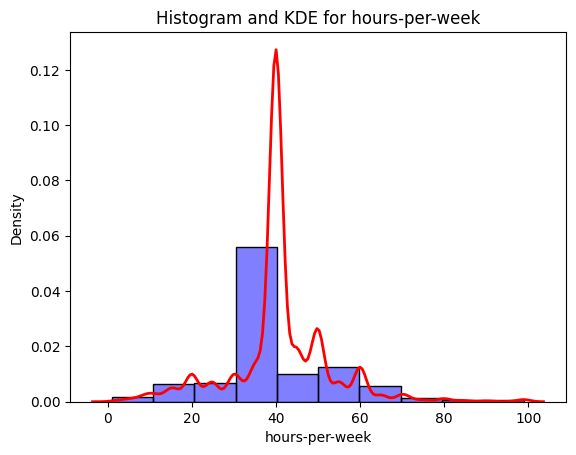

In [13]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Box Plot

In [14]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

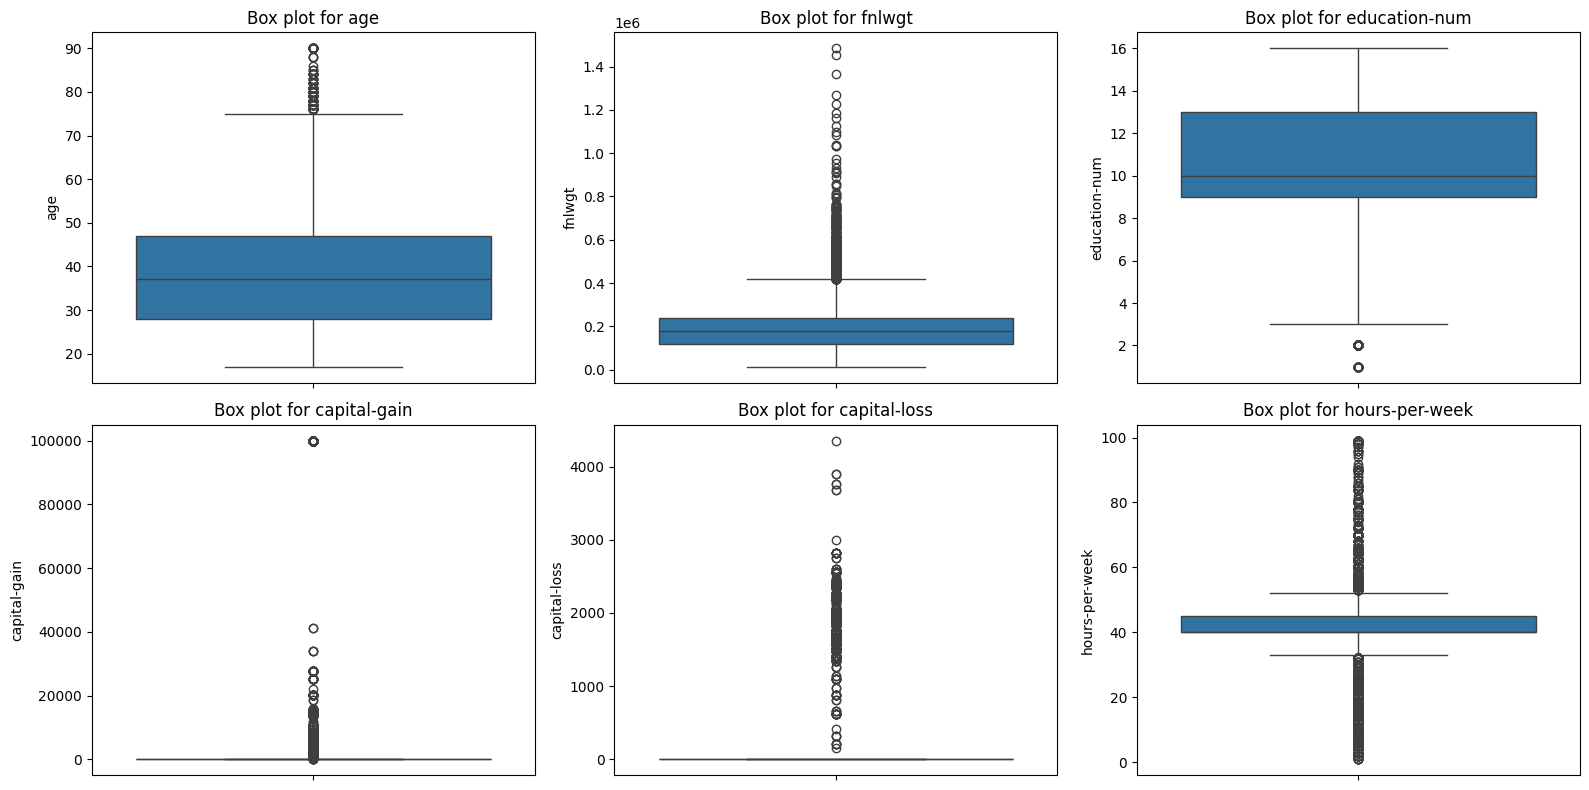

In [15]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statistical metrics

In [16]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [17]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

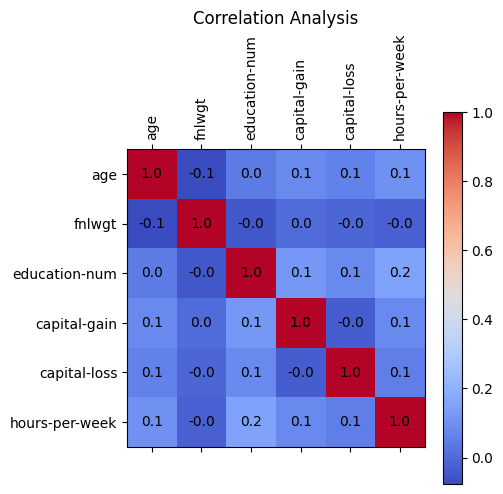

In [18]:
plot_correlation(dataset, numerical_cols)

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

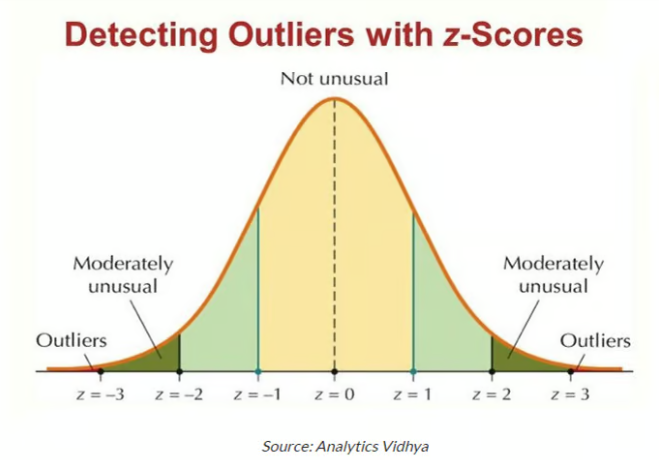

In [19]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

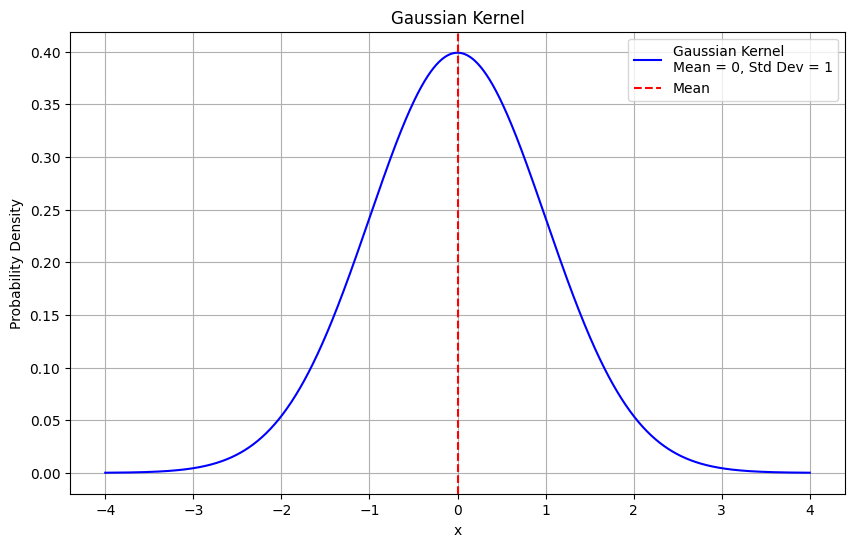

In [20]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [21]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [22]:
call_percentile(z = -2)

2.275

In [23]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [24]:
outliers_detection(dataset, "age").head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
144,70,Private,105376,Some-college,10,Never-married,Tech-support,Other-relative,White,Male,0,0,40,United-States,<=50K
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K
209,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K


In [25]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in age ***
#samples outlier to distribution = 946
%outliers = 3.14 %

*** Outliers detection in fnlwgt ***
#samples outlier to distribution = 1372
%outliers = 4.55 %

*** Outliers detection in education-num ***
#samples outlier to distribution = 859
%outliers = 2.85 %

*** Outliers detection in capital-gain ***
#samples outlier to distribution = 683
%outliers = 2.26 %

*** Outliers detection in capital-loss ***
#samples outlier to distribution = 499
%outliers = 1.65 %

*** Outliers detection in hours-per-week ***
#samples outlier to distribution = 1135
%outliers = 3.76 %


#### Categorical Variables

In [26]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['occupation',
 'native-country',
 'relationship',
 'education',
 'income',
 'workclass',
 'sex',
 'race',
 'marital-status']

Count instances for each categorical column

In [27]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** occupation ******
occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

***** native-country ******
native-country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic        

Bar chart - Analysis of absolute frequencies

In [28]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

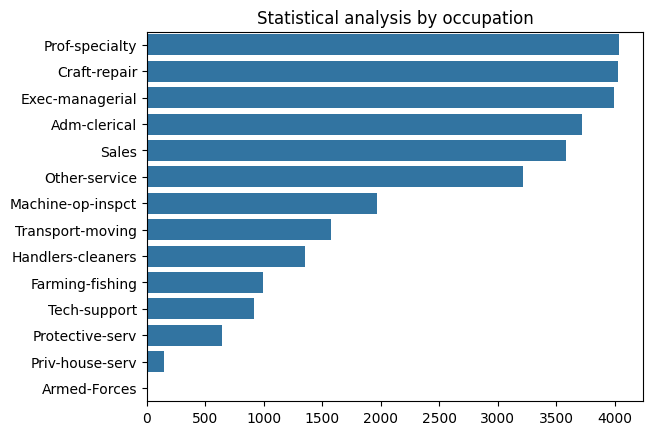

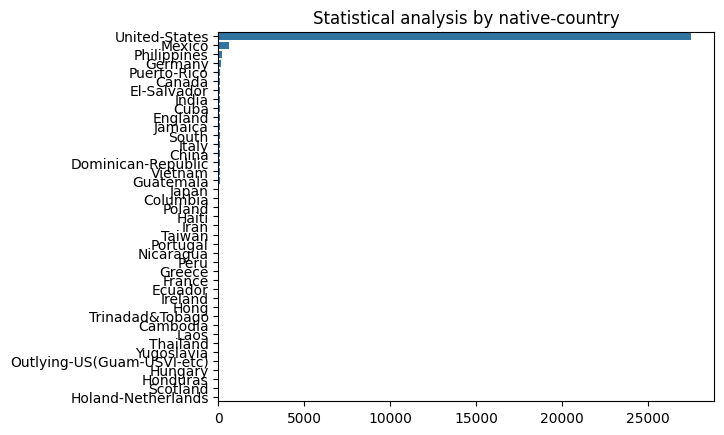

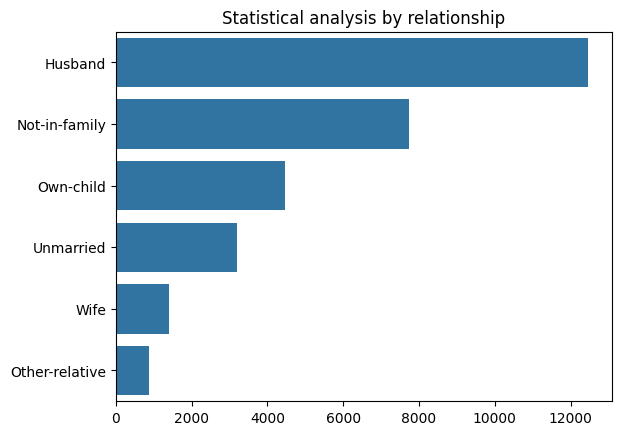

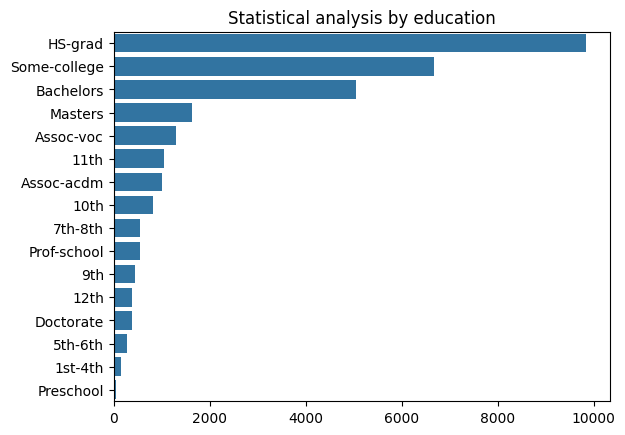

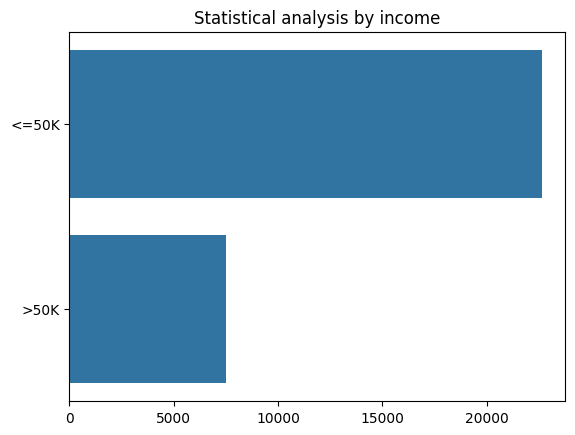

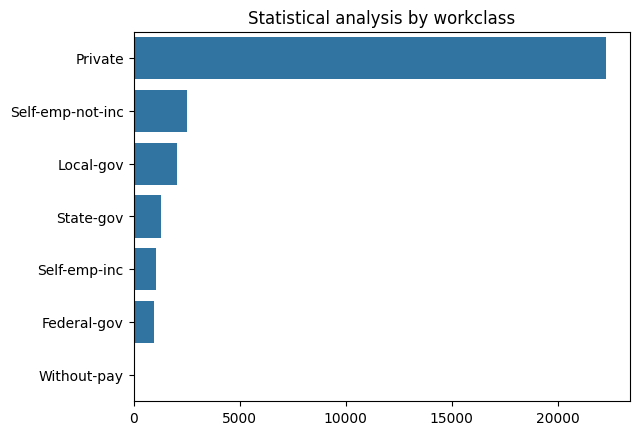

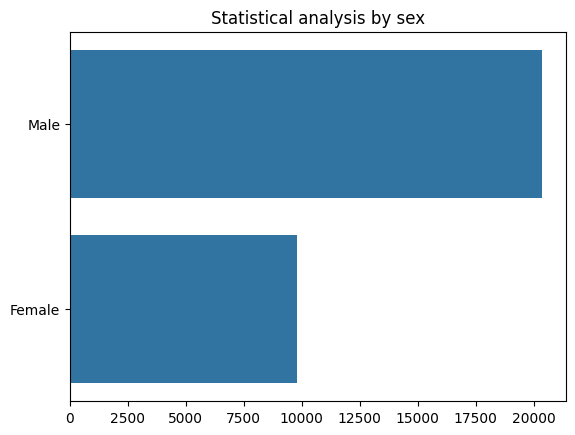

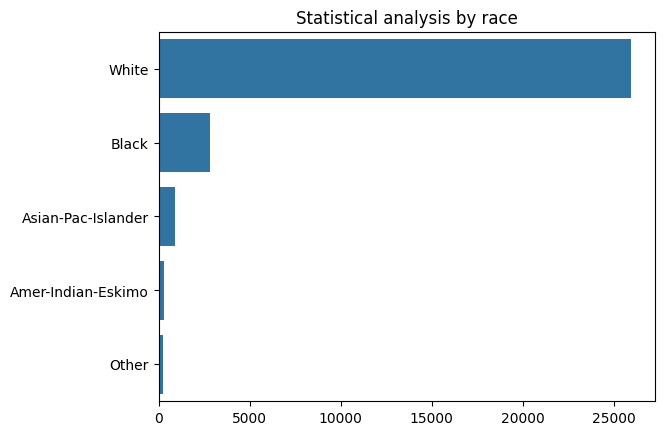

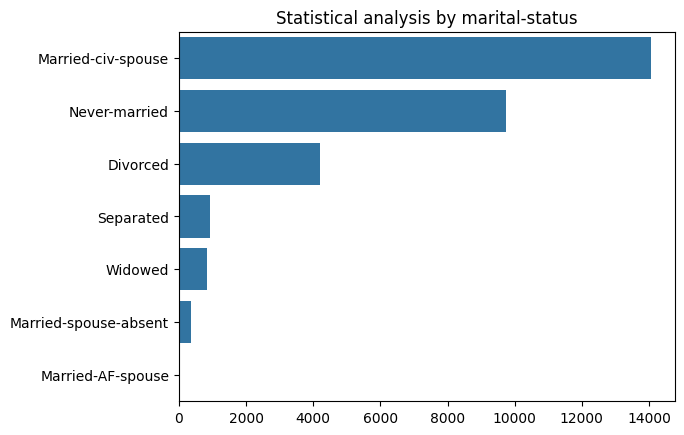

In [29]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

Pie Chart - Analysis of relative frequencies

In [30]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

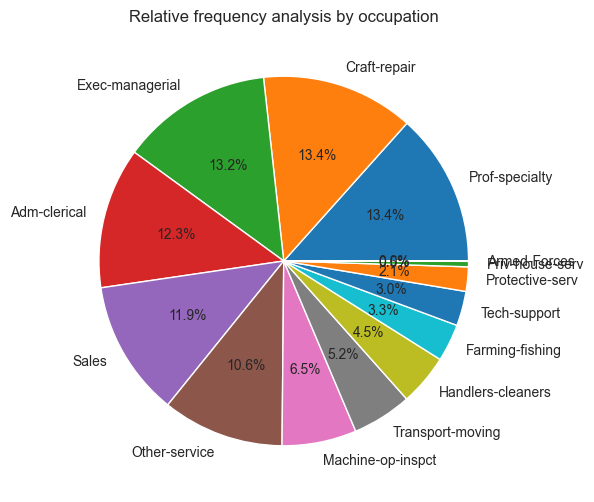

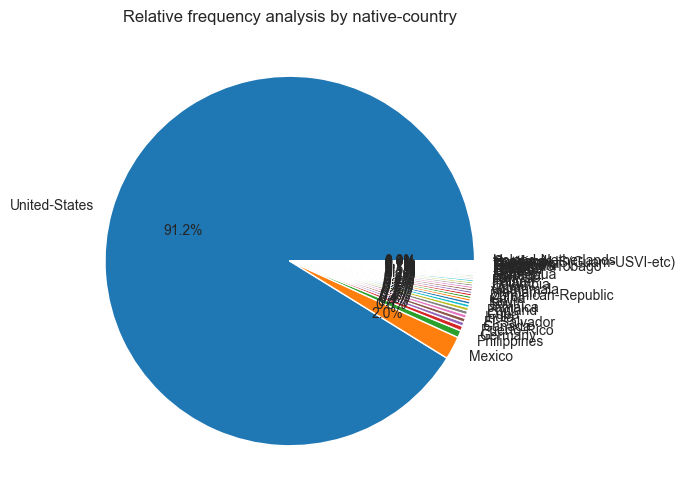

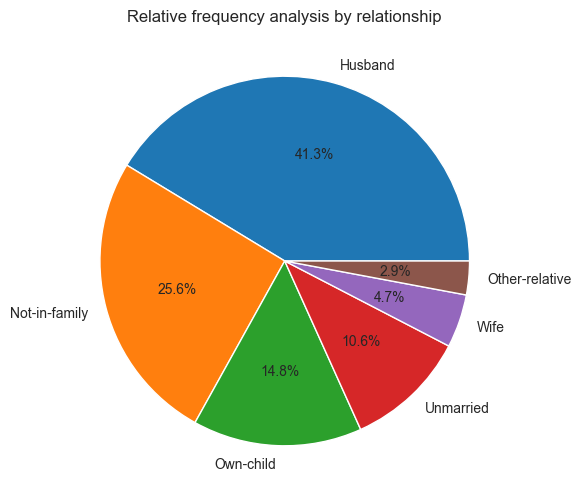

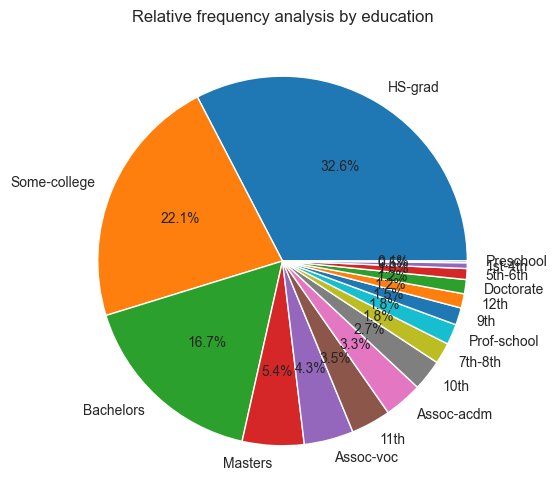

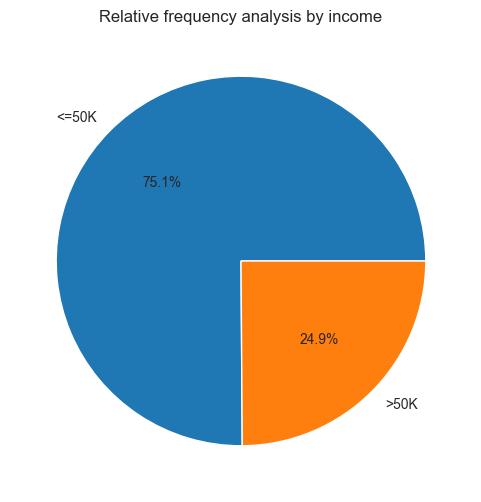

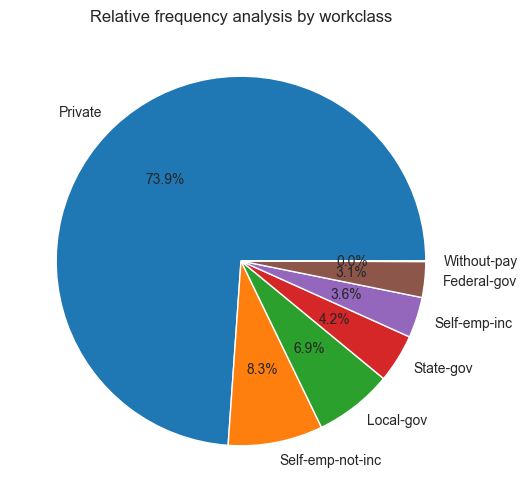

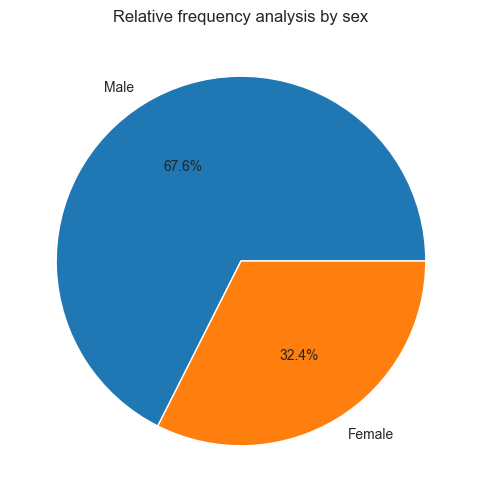

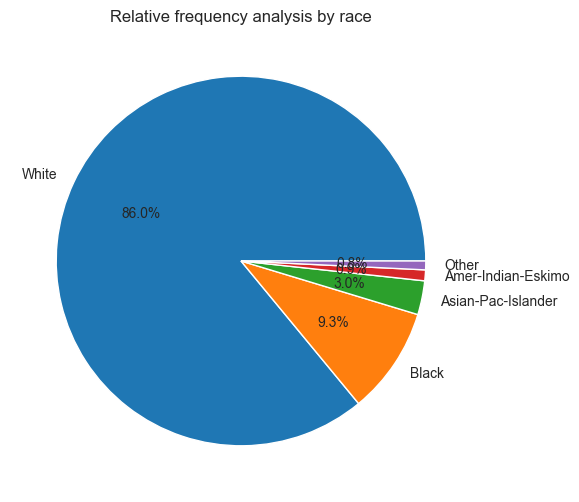

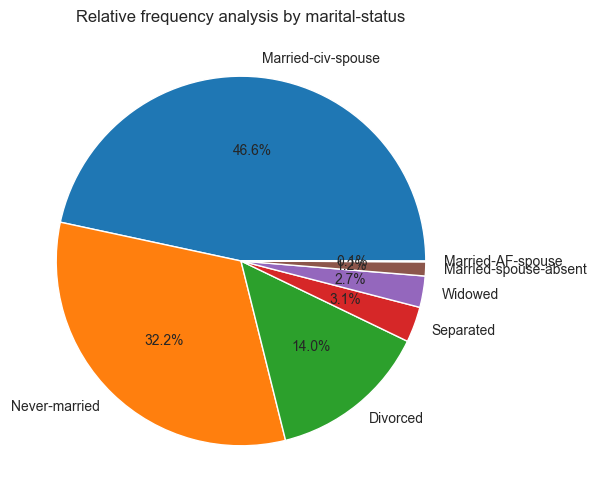

In [31]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Statistical Analysis for subgroups 

In [32]:
# create groups organized by sex and income
group_sex_income = dataset.groupby(["sex", "income"]).size().reset_index(name = "samples")
print(group_sex_income)

      sex income  samples
0  Female  <=50K     8670
1  Female   >50K     1112
2    Male  <=50K    13984
3    Male   >50K     6396


In [33]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Sex')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Sex and Salary')
    plt.tight_layout()
    plt.show()

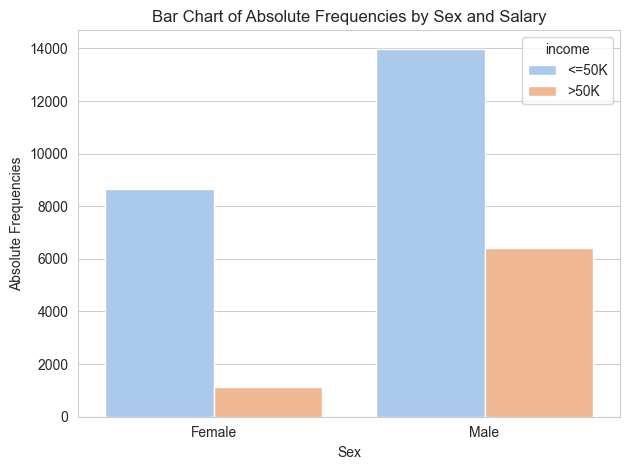

In [34]:
plot_absfreq_groups(group_sex_income, "sex", "income")

In [35]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with salary " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Sex and Salary')
    plt.show()

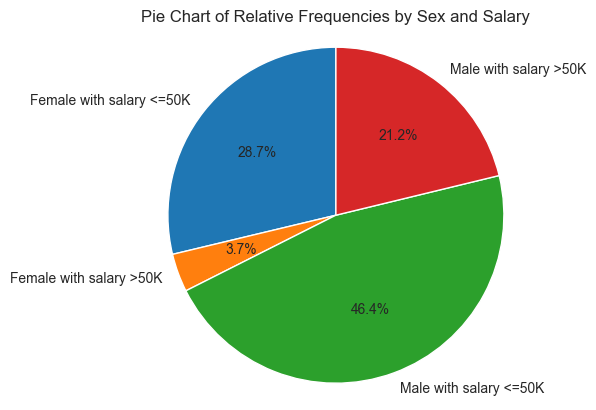

In [36]:
plot_relfreq_groups(group_sex_income, "sex", "income")